In [1]:
#TASK 1 and Task2 : Traning the models with LR, RF and XGB and plotting the necessary graphs in each sections
# STEP 1: Import required libraries

import pandas as pd                    
import numpy as np                   

# Machine Learning models (Import)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model utilities required
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# STEP 2: Load the CO2 Emissions dataset
path = r"E:\Analytics club\dataset.csv"

# Loading the dataset
df = pd.read_csv(path)

# View first rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
     country        date sector      value   timestamp
0     Brazil  01/01/2019  Power   0.096799  1546300800
1      China  01/01/2019  Power  14.816100  1546300800
2  EU27 & UK  01/01/2019  Power   1.886490  1546300800
3     France  01/01/2019  Power   0.051217  1546300800
4    Germany  01/01/2019  Power   0.315002  1546300800


In [2]:
# Step 3: Sort by country, then sector, then date
df_sorted = df.sort_values(by=['country', 'sector', 'date'], ascending=True).reset_index(drop=True)

# Show first 10 rows to verify
print(df_sorted.head(10))

  country        date             sector     value   timestamp
0  Brazil  01/01/2019  Domestic Aviation  0.023750  1546300800
1  Brazil  01/01/2020  Domestic Aviation  0.022615  1577836800
2  Brazil  01/01/2021  Domestic Aviation  0.015856  1609459200
3  Brazil  01/01/2022  Domestic Aviation  0.023211  1640995200
4  Brazil  01/01/2023  Domestic Aviation  0.020074  1672531200
5  Brazil  01/02/2019  Domestic Aviation  0.031606  1548979200
6  Brazil  01/02/2020  Domestic Aviation  0.032422  1580515200
7  Brazil  01/02/2021  Domestic Aviation  0.024146  1612137600
8  Brazil  01/02/2022  Domestic Aviation  0.027950  1643673600
9  Brazil  01/02/2023  Domestic Aviation  0.033422  1675209600


In [5]:
# Step 4: Count how many unique sectors are there
num_sectors = df['sector'].nunique()

print("Number of sectors:", num_sectors)
# Get all unique sector names
sectors = df['sector'].unique()

print("Sectors in the dataset:")
for s in sectors:
    print("-", s)

# Count records for each sector
sector_counts = df['sector'].value_counts()

print(sector_counts)


Number of sectors: 6
Sectors in the dataset:
- Power
- Industry
- Ground Transport
- Residential
- Domestic Aviation
- International Aviation
sector
Power                     22568
Industry                  22568
Ground Transport          22568
Residential               22568
Domestic Aviation         22568
International Aviation    22568
Name: count, dtype: int64


In [6]:
#Step 5: Grouping the data
df.groupby(['country', 'sector'])['value'].mean().reset_index()

country                  sector      value
0   Brazil       Domestic Aviation   0.025095
1   Brazil        Ground Transport   0.445105
2   Brazil                Industry   0.348850
3   Brazil  International Aviation   0.012285
4   Brazil                   Power   0.207573
..     ...                     ...        ...
79   WORLD        Ground Transport  17.262720
80   WORLD                Industry  29.702833
81   WORLD  International Aviation   1.196302
82   WORLD                   Power  37.600642
83   WORLD             Residential   9.865928

[84 rows x 3 columns]

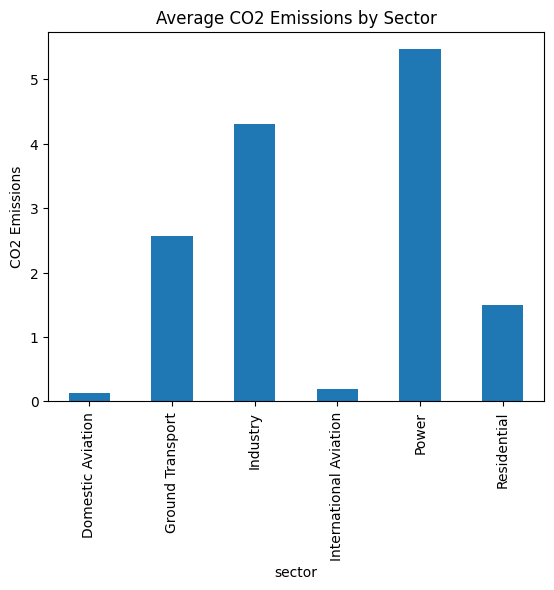

In [7]:
# Step 6: Understanding the contribution to CO2 emission by each sector for all countries
import matplotlib.pyplot as plt

df.groupby('sector')['value'].mean().plot(kind='bar')
plt.title("Average CO2 Emissions by Sector")
plt.ylabel("CO2 Emissions")
plt.show()

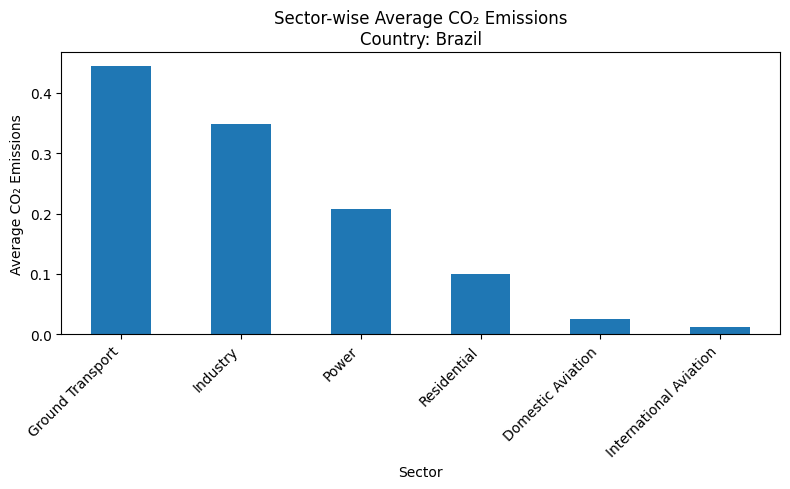

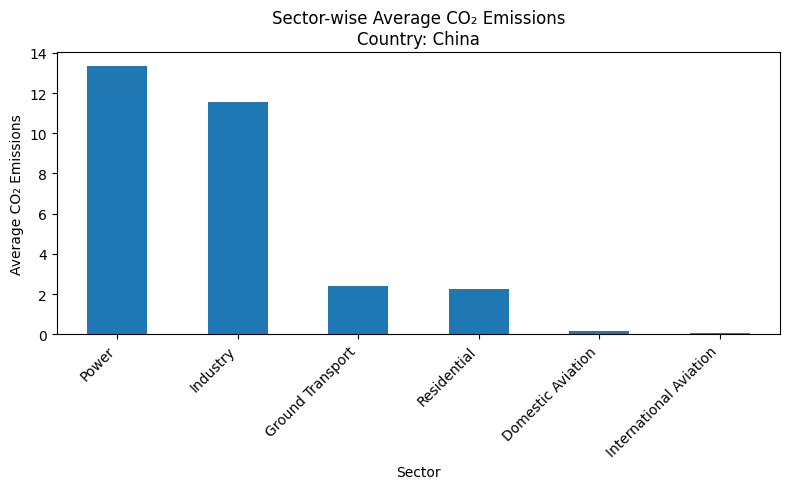

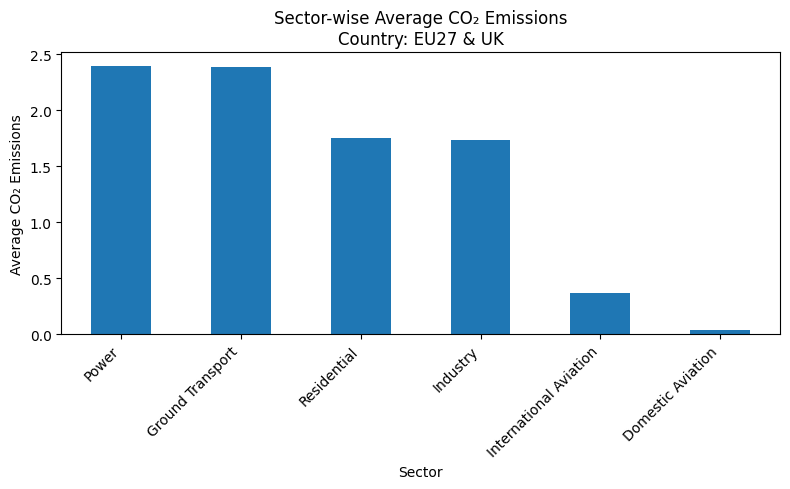

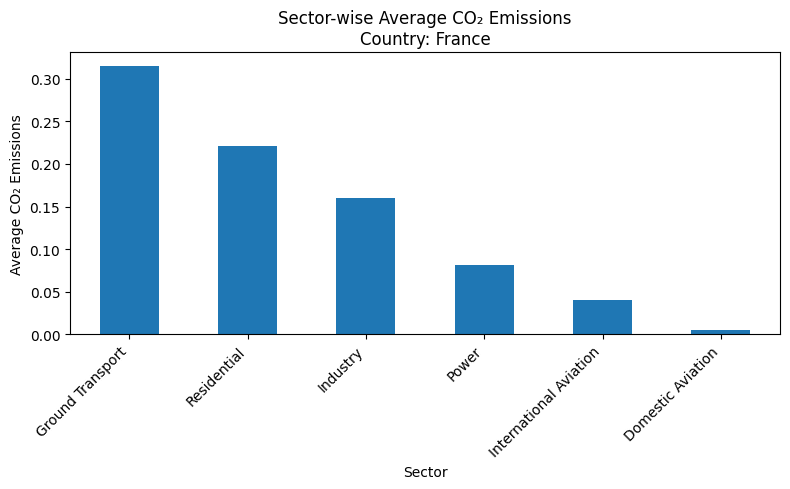

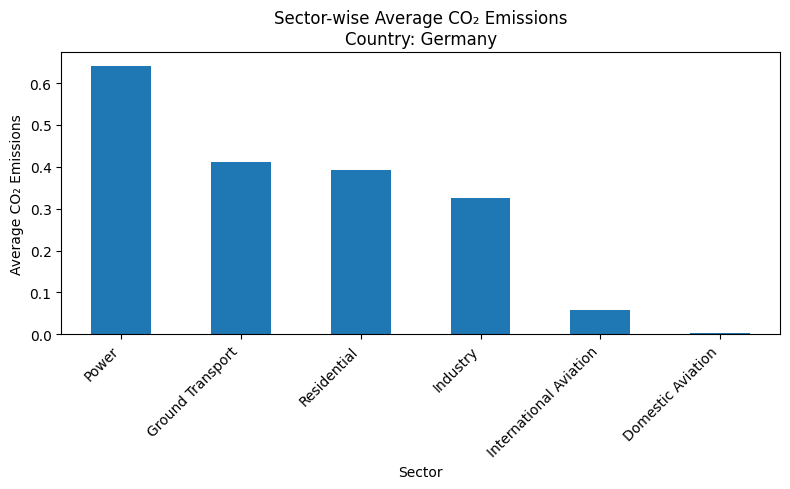

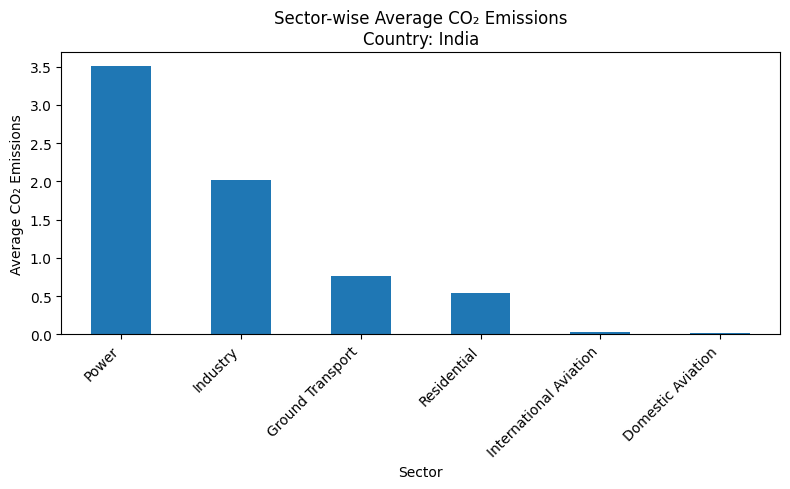

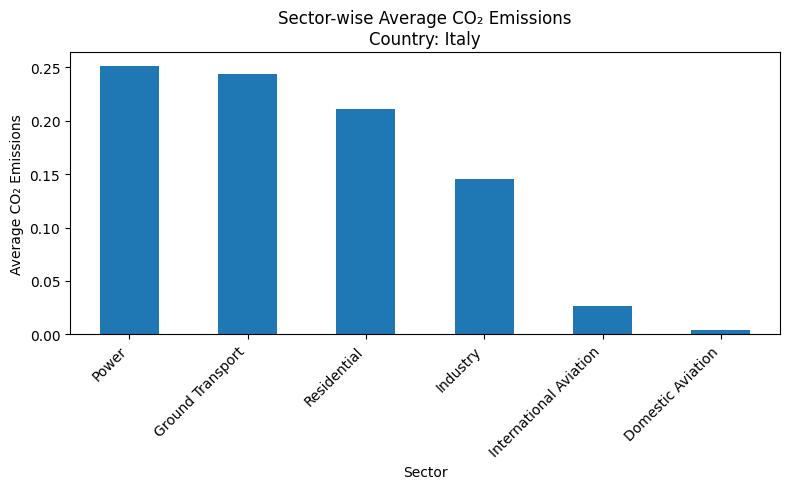

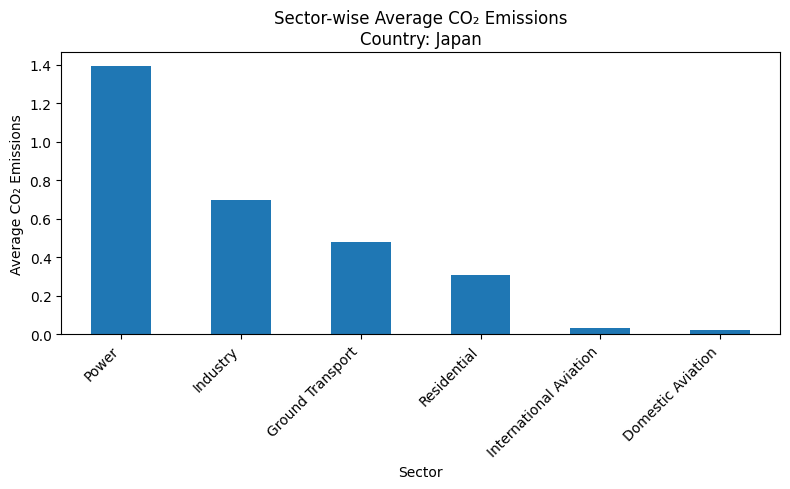

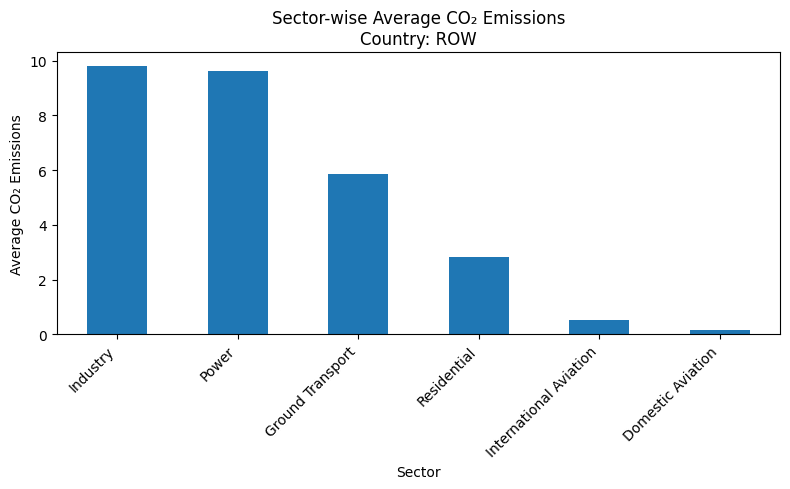

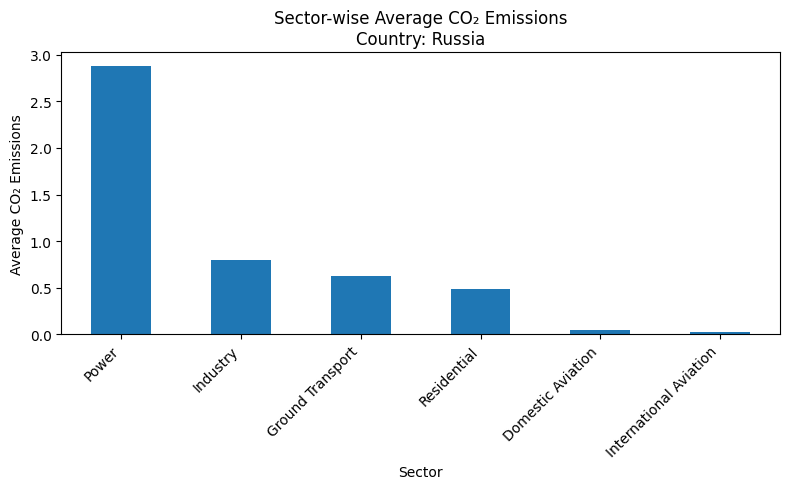

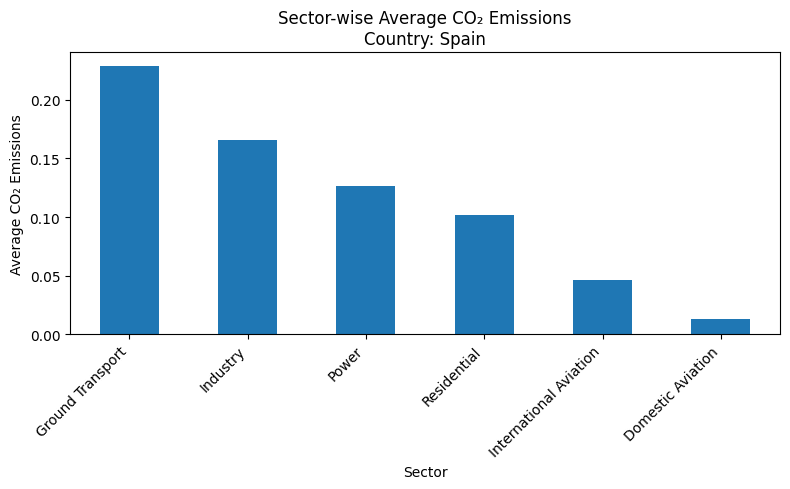

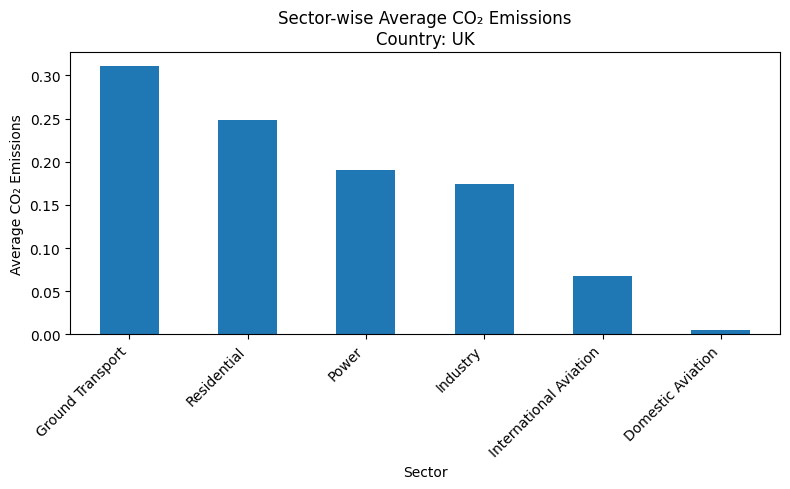

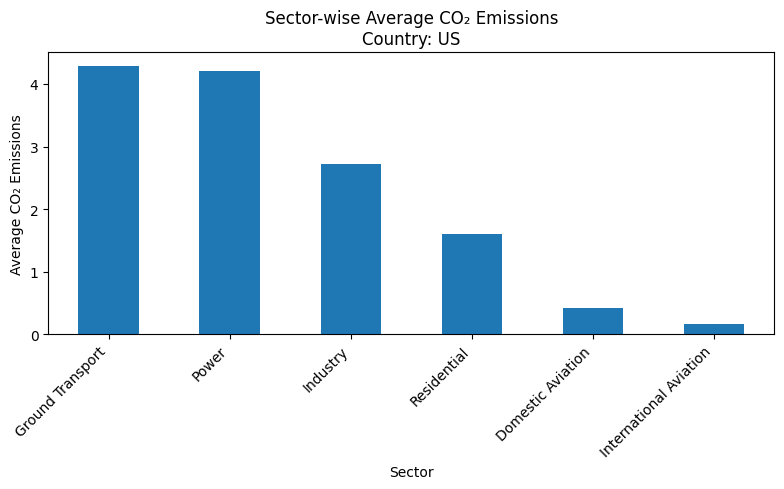

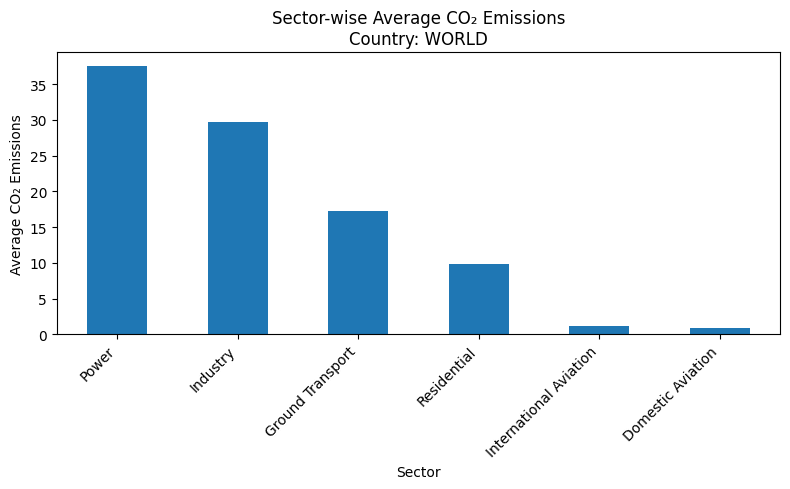

In [8]:
# Step 7: Understanding the contribution of each sector in CO2 emission for countries individually
# Rename value column for clarity
df.rename(columns={'value': 'CO2_emissions'}, inplace=True)

# Getting list of unique countries
countries = df['country'].unique()

# Looping through each country
for country in countries:
    # Filter data for the country
    country_df = df[df['country'] == country]
    
    # Calculate average CO2 emissions per sector
    sector_emissions = (
        country_df
        .groupby('sector')['CO2_emissions']
        .mean()
        .sort_values(ascending=False)
    )
    
    # Plot
    plt.figure(figsize=(8, 5))
    sector_emissions.plot(kind='bar')
    
    plt.title(f"Sector-wise Average CO₂ Emissions\nCountry: {country}")
    plt.xlabel("Sector")
    plt.ylabel("Average CO₂ Emissions")
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

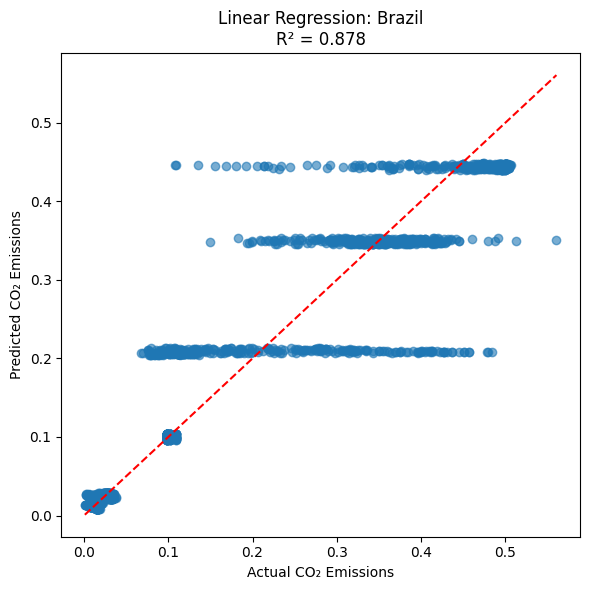

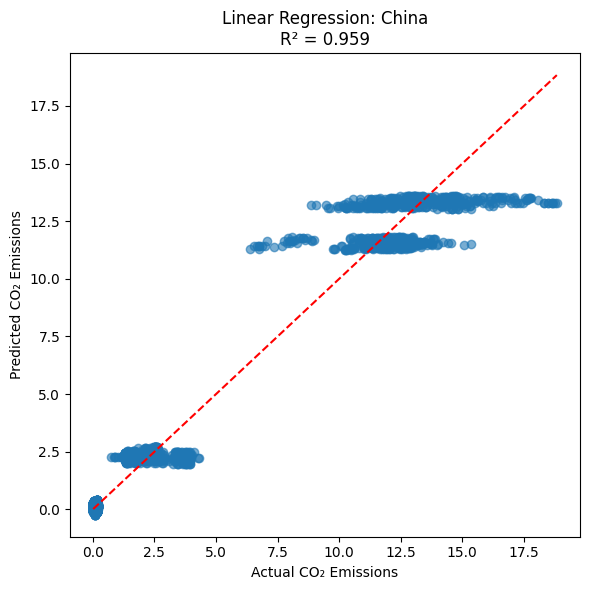

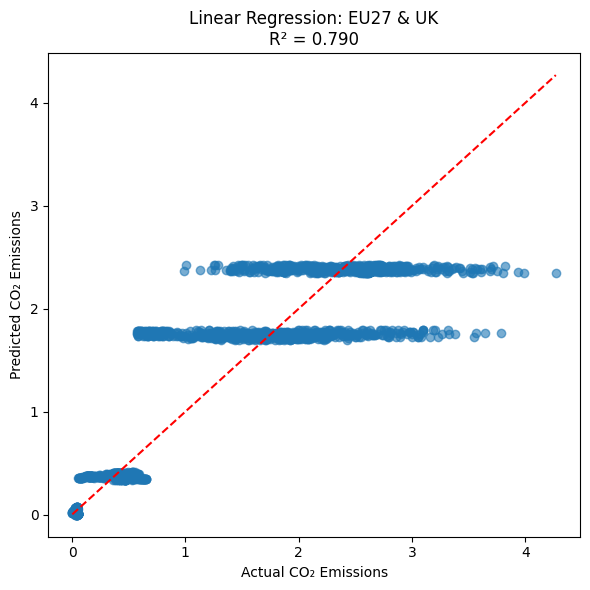

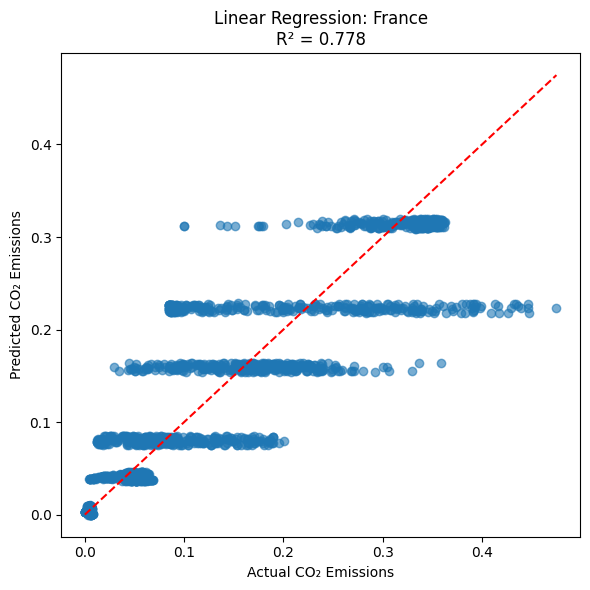

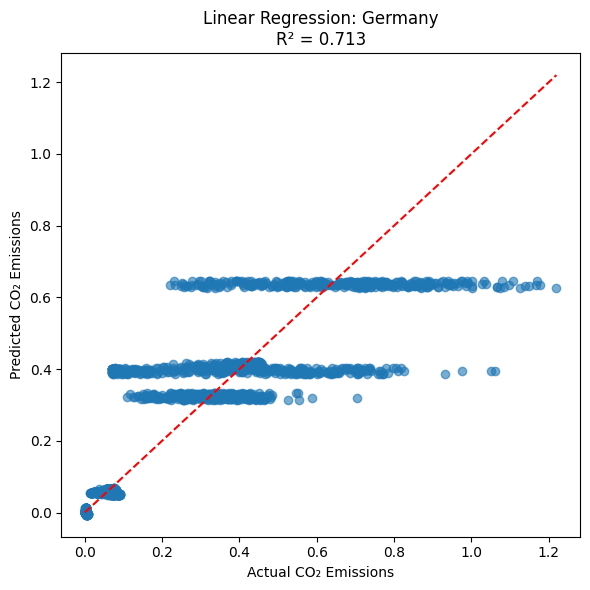

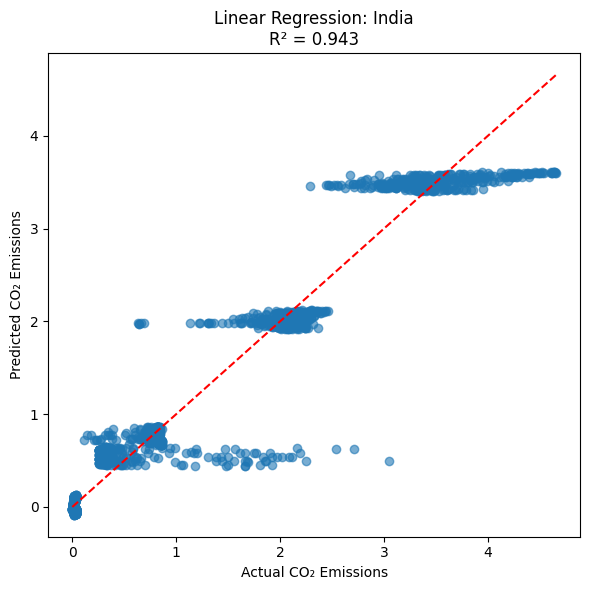

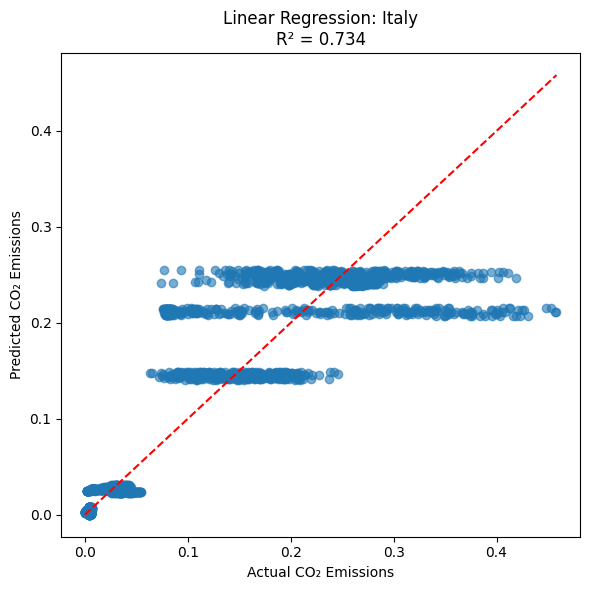

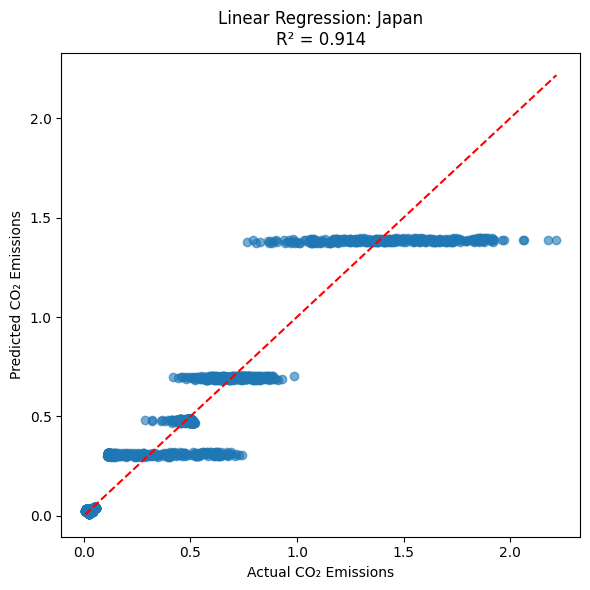

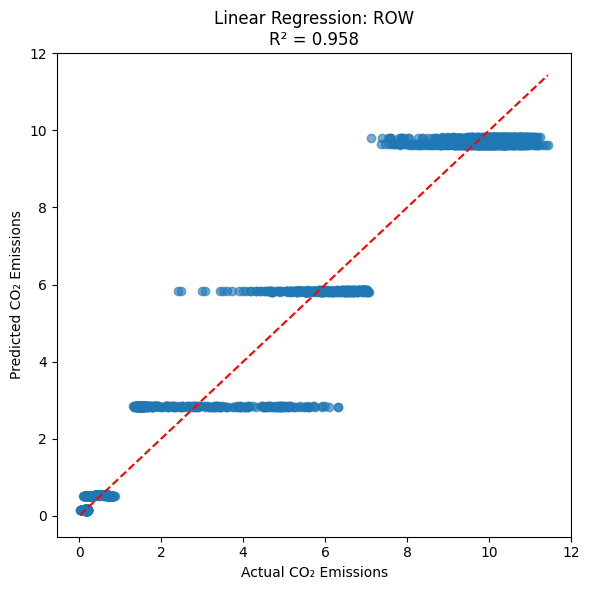

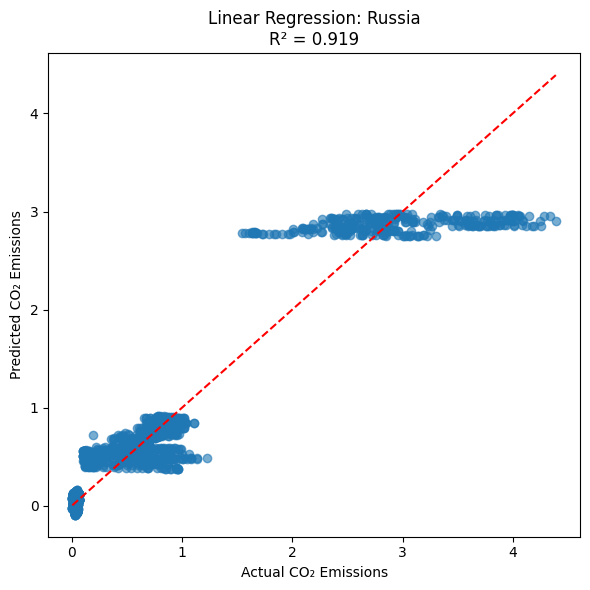

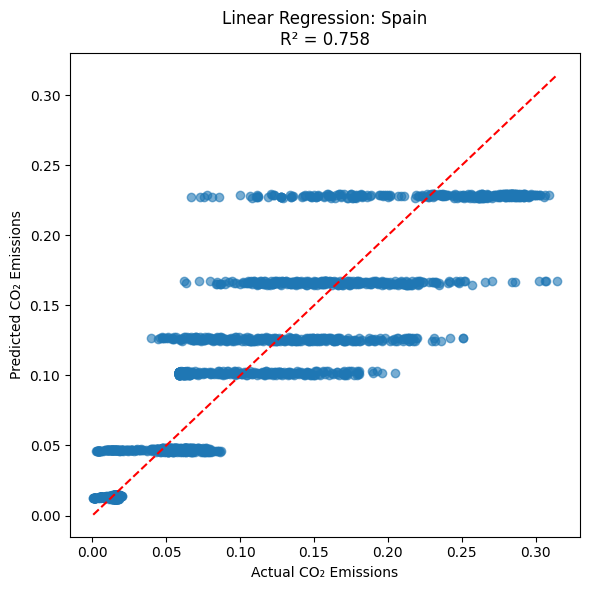

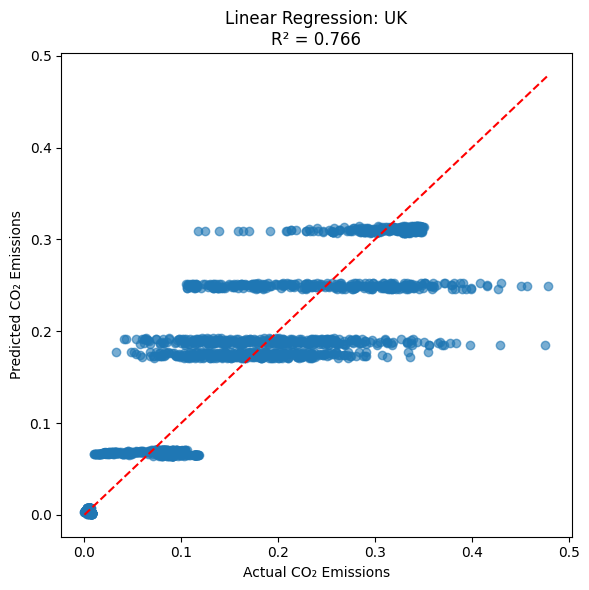

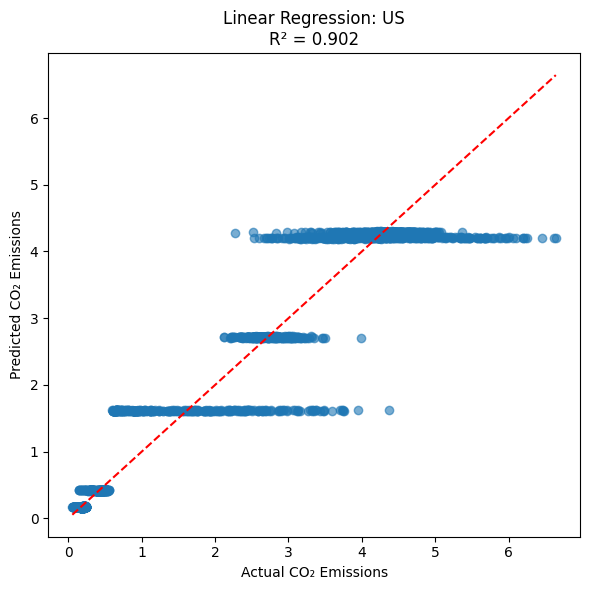

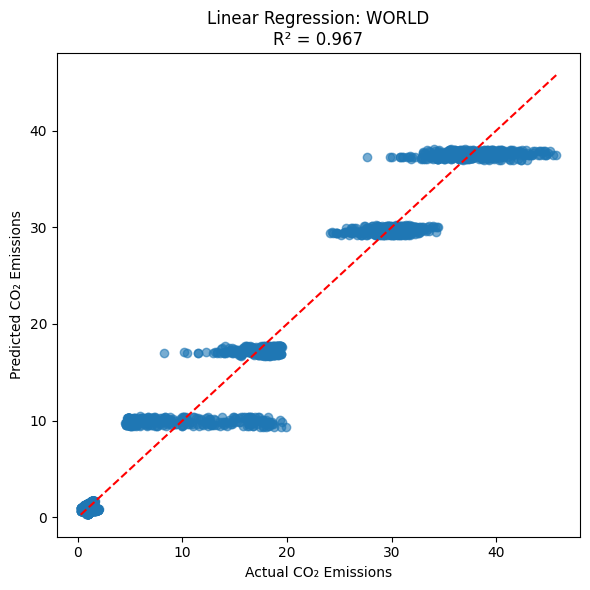

In [9]:
# Making the LR model for each country
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Load data
path = r"E:\Analytics club\dataset.csv"
df = pd.read_csv(path)

# Rename target column
df.rename(columns={'value': 'CO2_emissions'}, inplace=True)


df_encoded = pd.get_dummies(df, columns=['sector'], drop_first=False)

countries = sorted(df_encoded['country'].unique())

for country in countries:
    # Filter data for country
    df_country = df_encoded[df_encoded['country'] == country]
    
    # Features and target
    X = df_country.drop(columns=['CO2_emissions', 'country', 'date'])
    y = df_country['CO2_emissions']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Train Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # Predictions
    y_pred = lr.predict(X_test)
    
    # R2 score
    r2 = r2_score(y_test, y_pred)
    

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--'
    )
    
    plt.title(f"Linear Regression: {country}\nR² = {r2:.3f}")
    plt.xlabel("Actual CO₂ Emissions")
    plt.ylabel("Predicted CO₂ Emissions")
    
    plt.tight_layout()
    plt.show()


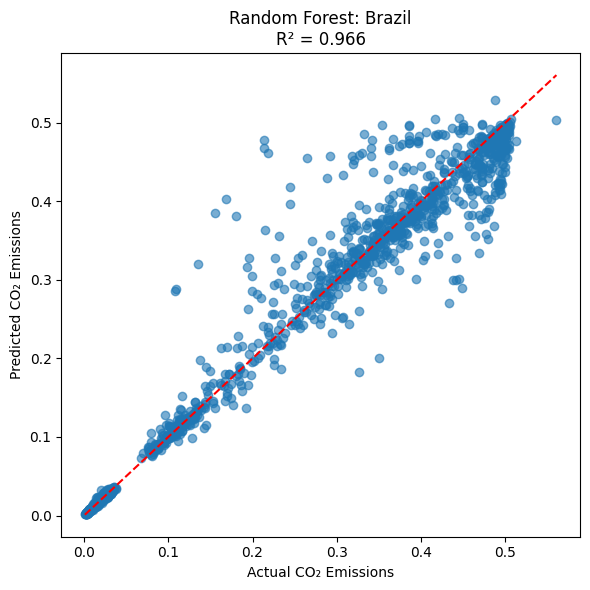

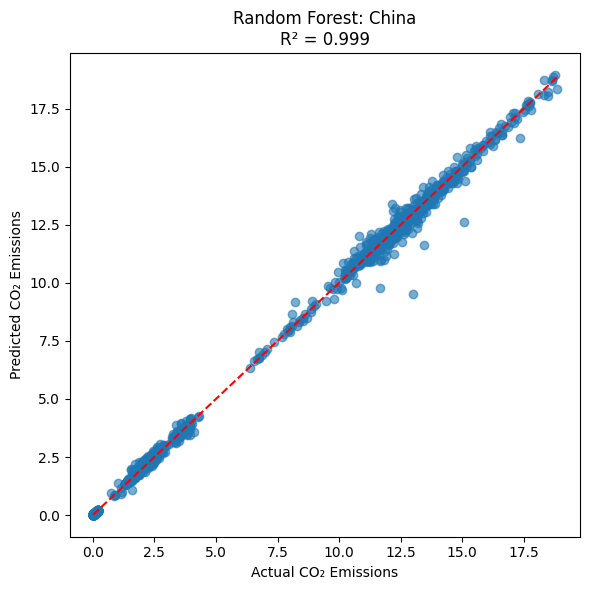

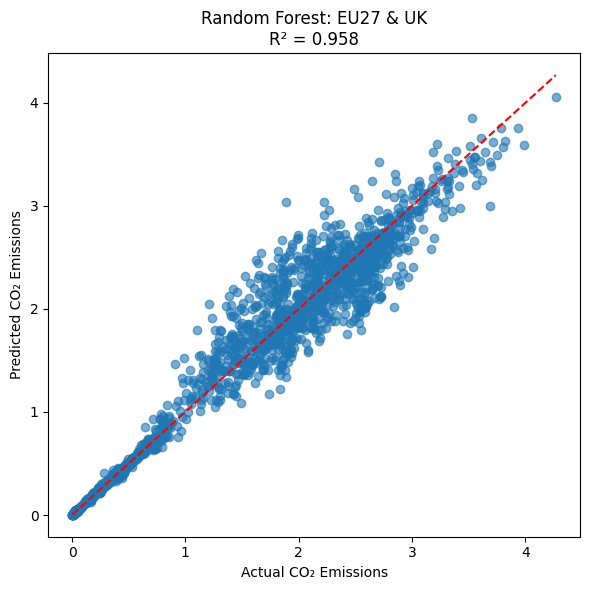

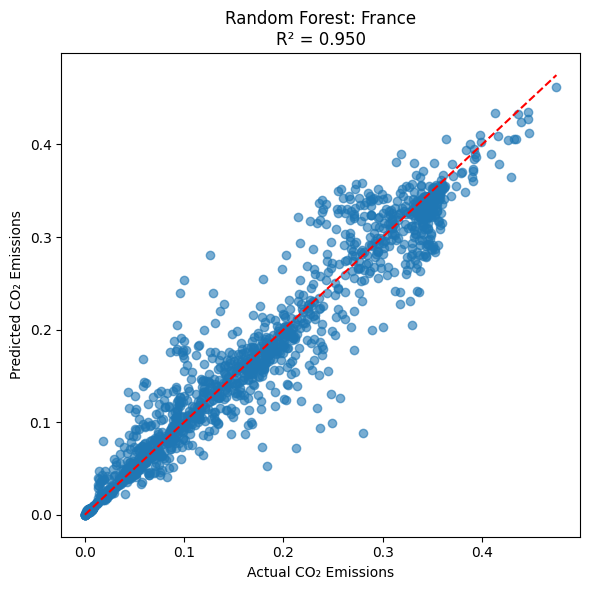

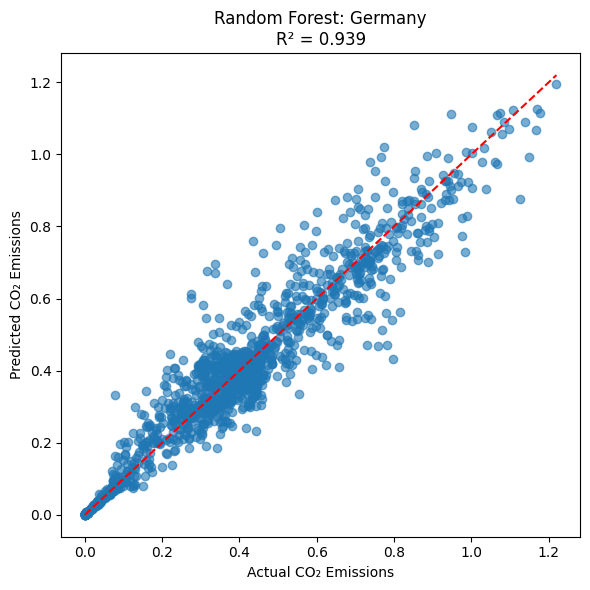

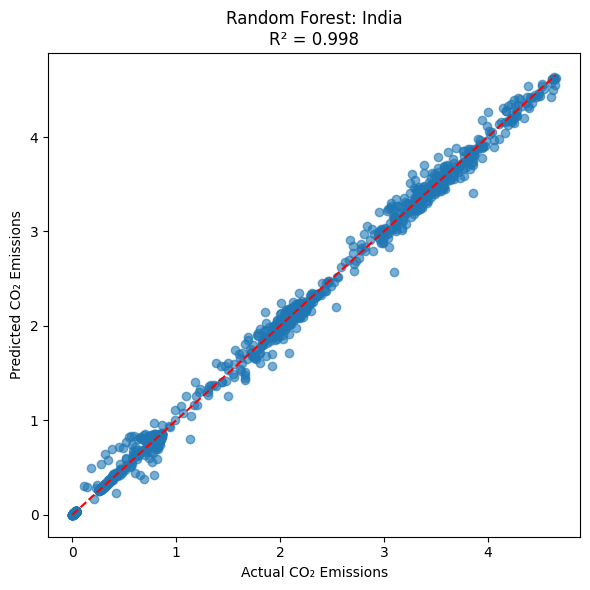

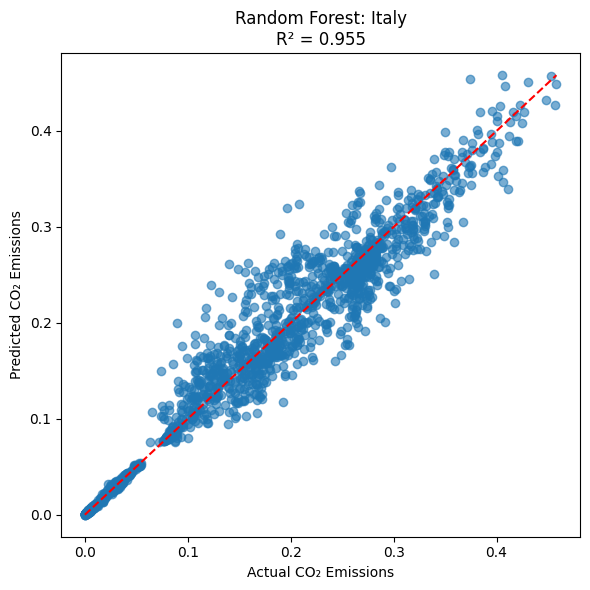

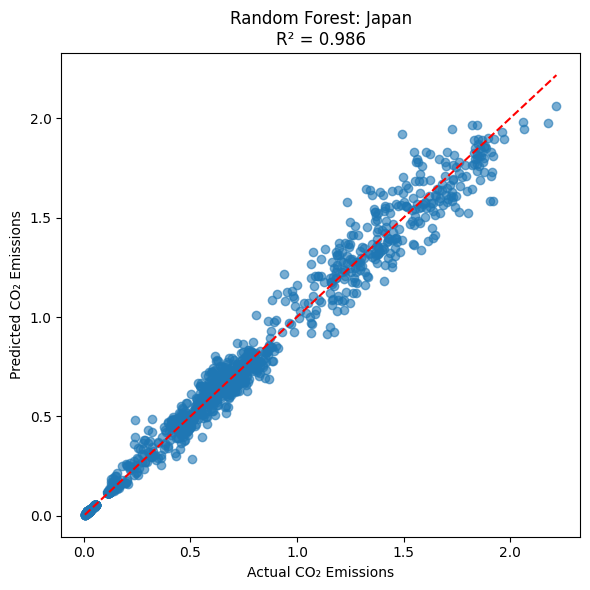

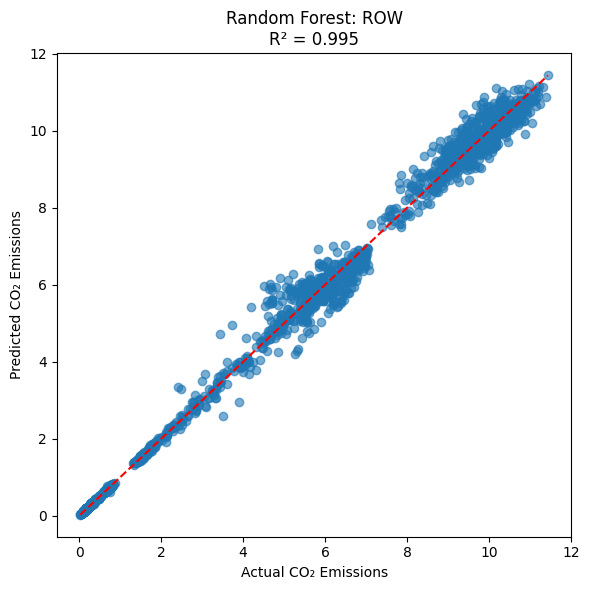

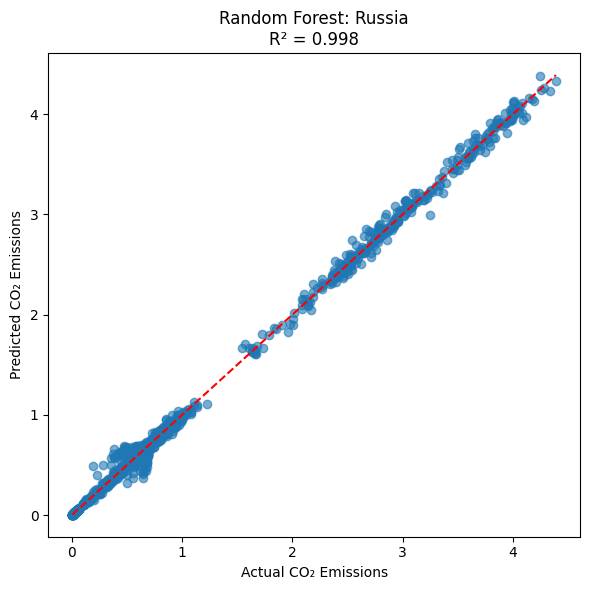

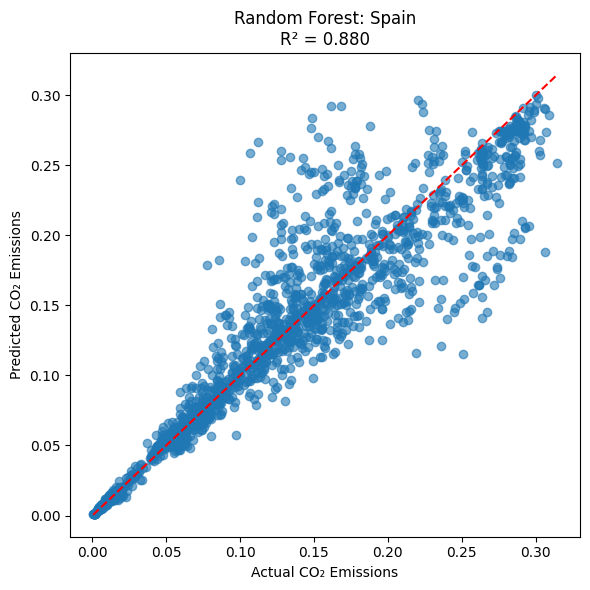

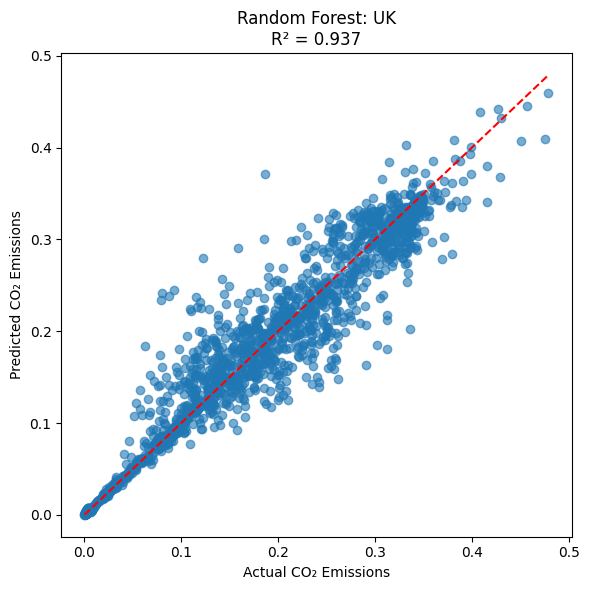

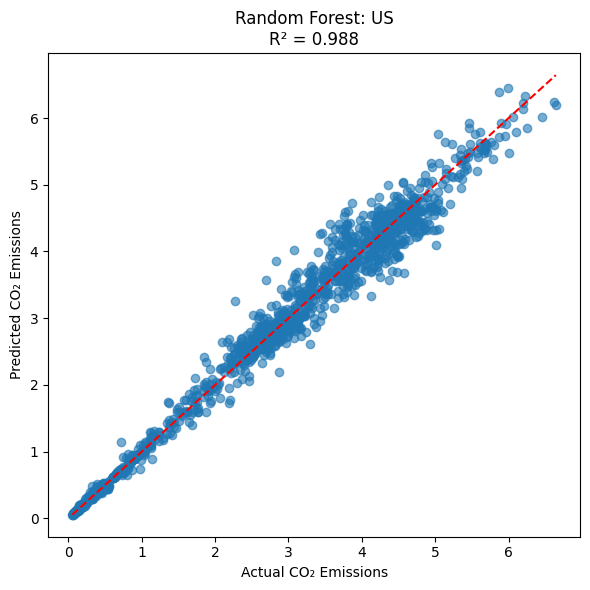

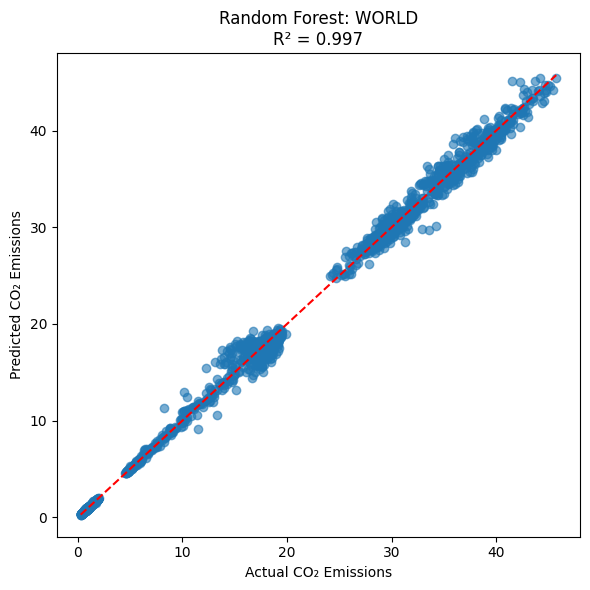

In [11]:
#For Random Forest model:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#  Loading data
path = r"E:\Analytics club\dataset.csv"
df = pd.read_csv(path)

# Renaming target column
df.rename(columns={'value': 'CO2_emissions'}, inplace=True)


# Train & plot per country (Random Forest)
countries = sorted(df_encoded['country'].unique())

for country in countries:
    # Filter data for country
    df_country = df_encoded[df_encoded['country'] == country]
    
    # Features and target
    X = df_country.drop(columns=['CO2_emissions', 'country', 'date'])
    y = df_country['CO2_emissions']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    

    # Train Random Forest model

    rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    
    rf.fit(X_train, y_train)
    
    # Predictions
    y_pred = rf.predict(X_test)
    
    # R2 score
    r2 = r2_score(y_test, y_pred)
    

    # Plot Actual vs Predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--'
    )
    
    plt.title(f"Random Forest: {country}\nR² = {r2:.3f}")
    plt.xlabel("Actual CO₂ Emissions")
    plt.ylabel("Predicted CO₂ Emissions")
    
    plt.tight_layout()
    plt.show()


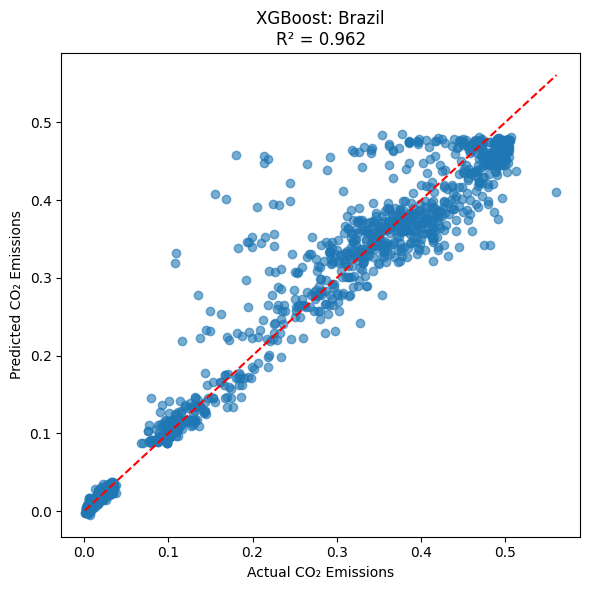

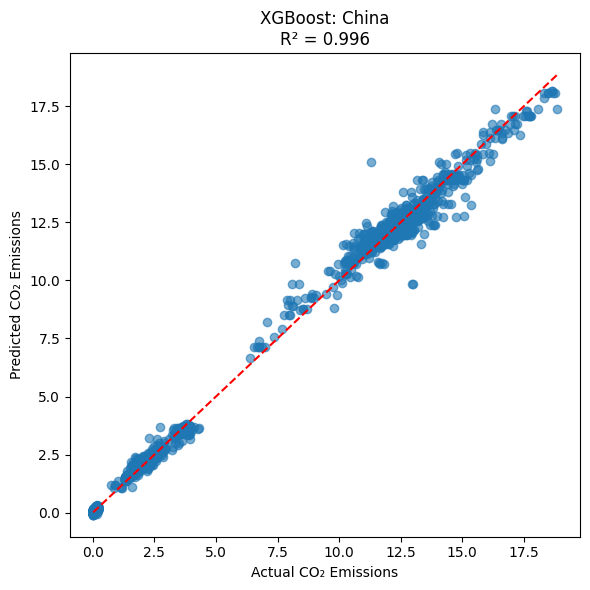

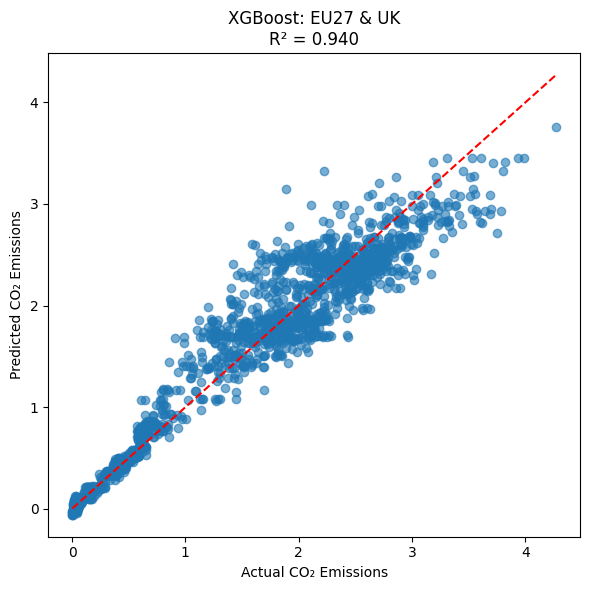

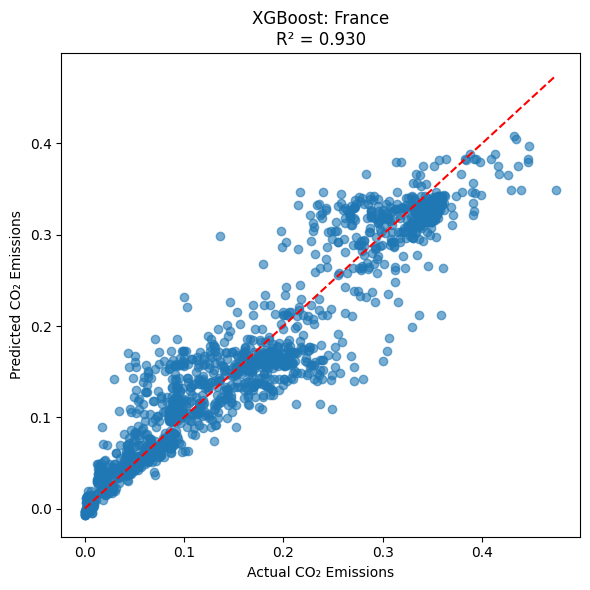

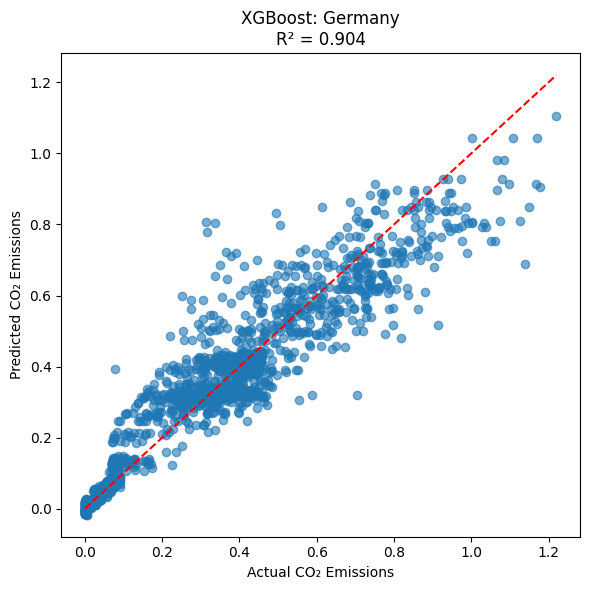

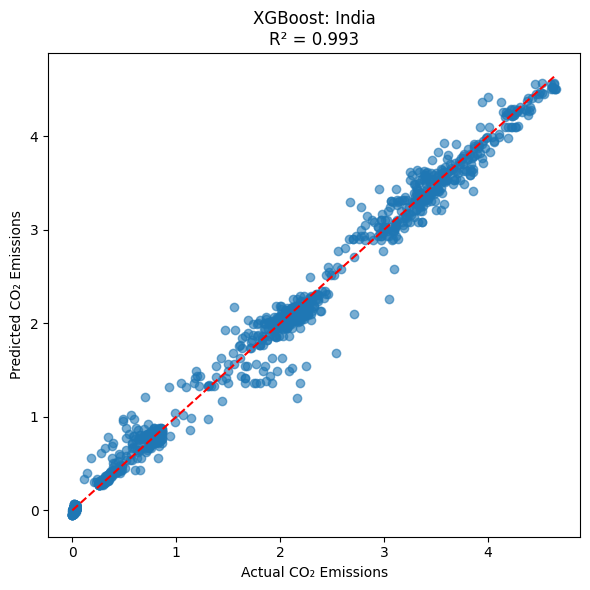

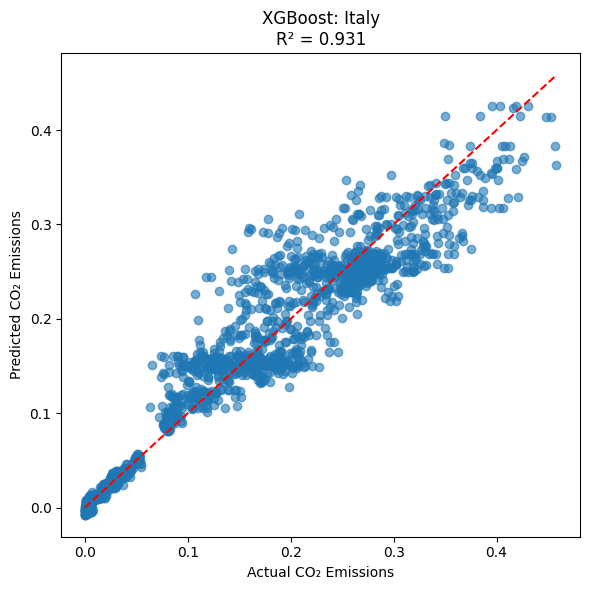

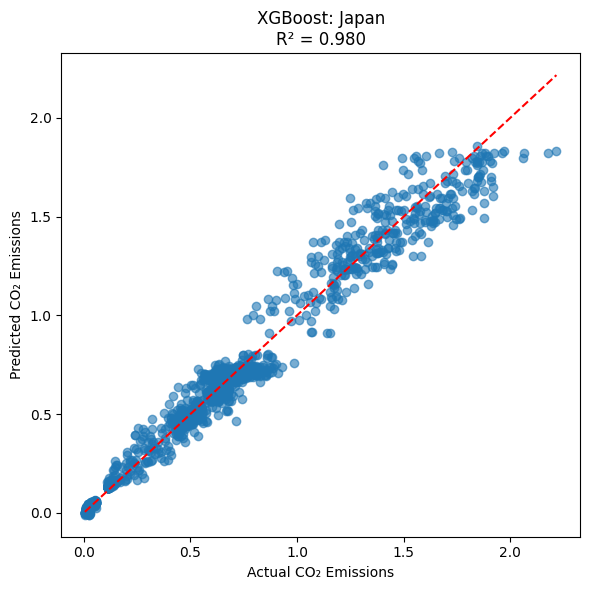

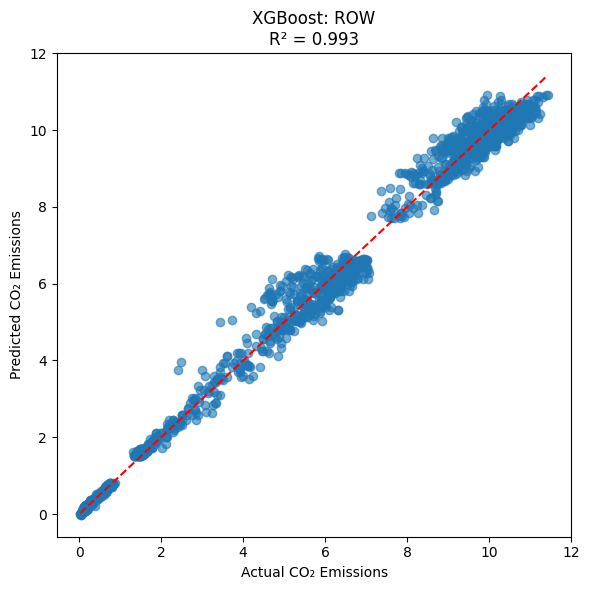

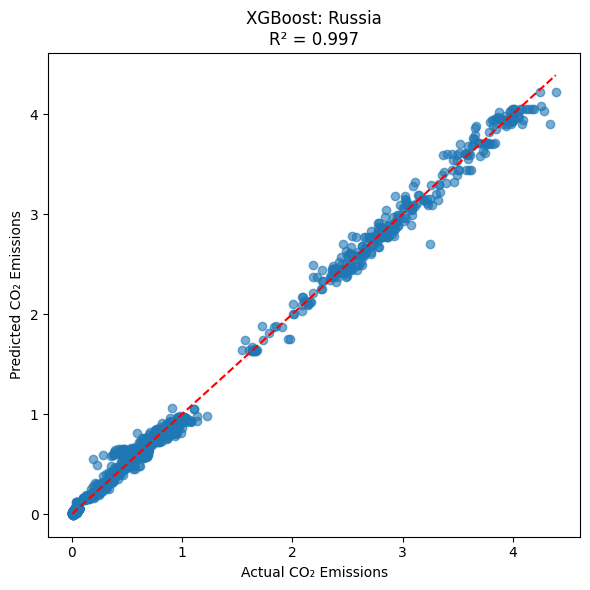

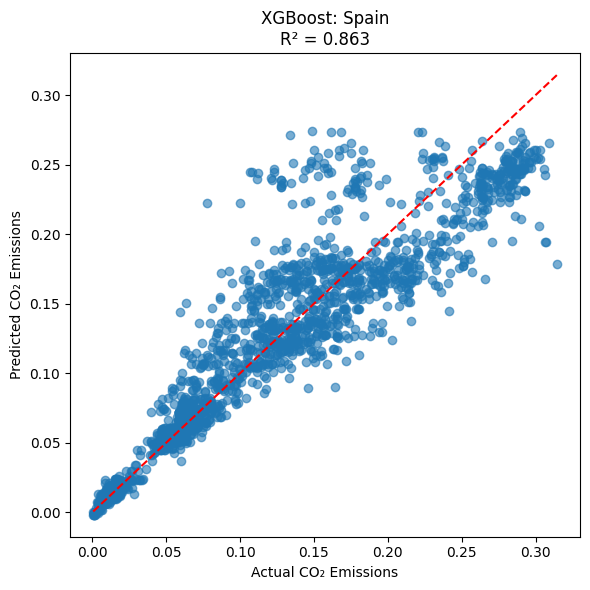

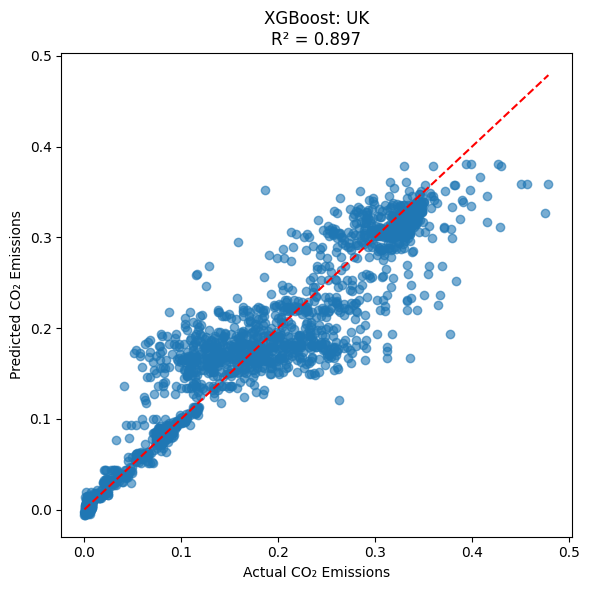

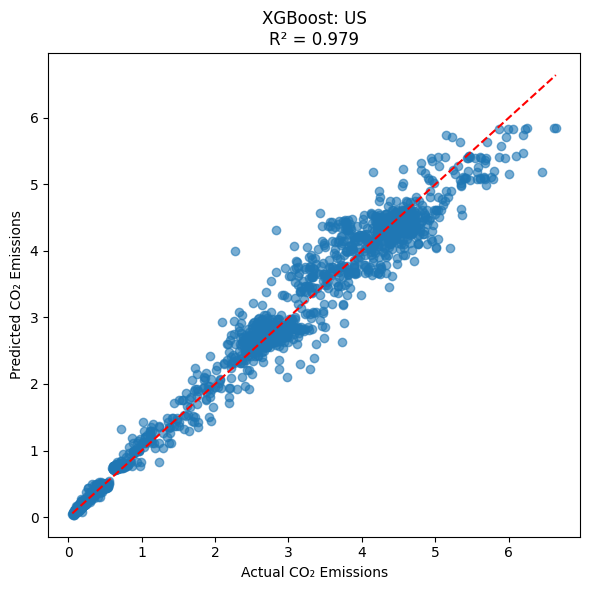

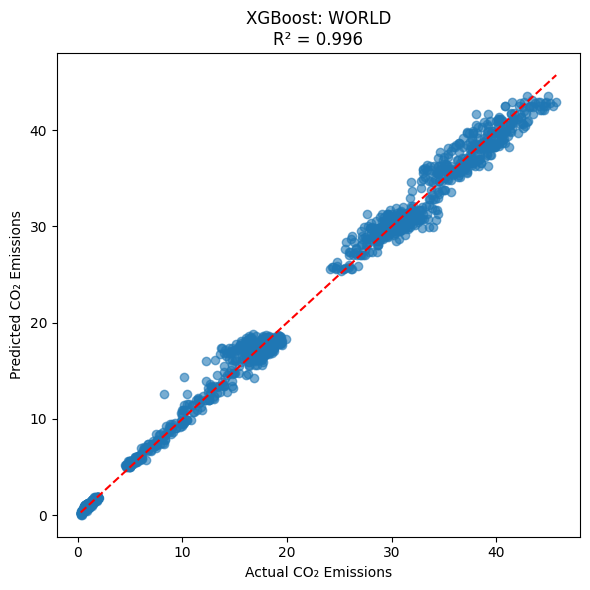

In [12]:
#For XGBooster model:

import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Loading the original data

path = r"E:\Analytics club\dataset.csv"
df = pd.read_csv(path)

# Rename target column
df.rename(columns={'value': 'CO2_emissions'}, inplace=True)


#  Training & ploting per country (XGBoost)

countries = sorted(df_encoded['country'].unique())

for country in countries:
    # Filter data for country
    df_country = df_encoded[df_encoded['country'] == country]
    
    # Features and target
    X = df_country.drop(columns=['CO2_emissions', 'country', 'date'])
    y = df_country['CO2_emissions']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
  
    # Train XGBoost model

    xgb = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
    
    xgb.fit(X_train, y_train)
    
    # Predictions
    y_pred = xgb.predict(X_test)
    
    # R2 score
    r2 = r2_score(y_test, y_pred)
    

    # Plot Actual vs Predicted

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--'
    )
    
    plt.title(f"XGBoost: {country}\nR² = {r2:.3f}")
    plt.xlabel("Actual CO₂ Emissions")
    plt.ylabel("Predicted CO₂ Emissions")
    
    plt.tight_layout()
    plt.show()


In [13]:
#Task3: Identifying the top 5 parameters contributing to carbon intensity using: Random Forest 
from sklearn.ensemble import RandomForestRegressor

# Example: using one country ('India')
country = "India"
df_country = df_encoded[df_encoded['country'] == country]

# Features and target
X = df_country.drop(columns=['CO2_emissions', 'country', 'date'])
y = df_country['CO2_emissions']

# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Top 5 features
top5 = importances.sort_values(ascending=False).head(5)
print(f"Top 5 features contributing to CO2 emissions ({country}):")
print(top5)


Top 5 features contributing to CO2 emissions (India):
sector_Power               0.671636
sector_Industry            0.226719
timestamp                  0.058674
sector_Ground Transport    0.024547
sector_Residential         0.018420
dtype: float64
